# Feature Selection
1. Numerical column vs Target => Corelation (pearson-coefficient)
2. Category column vs Target => Box plots

In [35]:
import pandas as pd

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
# fixing the dataset/ handling missing values
import numpy as np
from sklearn.impute import SimpleImputer

df.replace('?', np.nan, inplace=True)
# numerical columns
num_cols_to_fix  = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
# categorical columns
cat_cols_to_fix = ['num-of-doors']

ni = SimpleImputer()                            # missing value fix by mean
ci = SimpleImputer(strategy='most_frequent')    # missing value fix by most frequent
df[num_cols_to_fix] = ni.fit_transform(df[num_cols_to_fix]) 
df[cat_cols_to_fix] = ci.fit_transform(df[cat_cols_to_fix])
df.dropna(inplace=True) # remove the nan value records from the dataset
df.price = df.price.astype(int)
df.shape 

(201, 26)

In [39]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


Correlation Rules
- values must be within [-1,1]
- values near 0 are not very important
- values that are near -1 or 1 are very important
- values near -1 are called negatively correlated
- values near 1 are called positively correlated
- you have to select a threshold to determine if a value is correlated or not ( default is 0.5 )

In [41]:
df.corr(method='spearman') # not so visually appealing

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.180029,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.022405,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.537537,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639575,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.606621,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.222777,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702016,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.697316,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.180029,-0.022405,0.537537,0.639575,0.606621,0.222777,0.702016,0.697316,1.000000,-0.084074,-0.169436,0.640574,-0.305171,-0.607415,-0.619292,0.645943
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084074,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# get all the numerical columns
num_cols = df.select_dtypes(include=['int64','float64','int32']).columns.tolist()
# get all the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical columns:\n', " | ".join(num_cols))
print('Categorical columns:\n', " | ".join(cat_cols))

Numerical columns:
 symboling | normalized-losses | wheel-base | length | width | height | curb-weight | engine-size | bore | stroke | compression-ratio | horsepower | peak-rpm | city-mpg | highway-mpg | price
Categorical columns:
 make | fuel-type | aspiration | num-of-doors | body-style | drive-wheels | engine-location | engine-type | num-of-cylinders | fuel-system


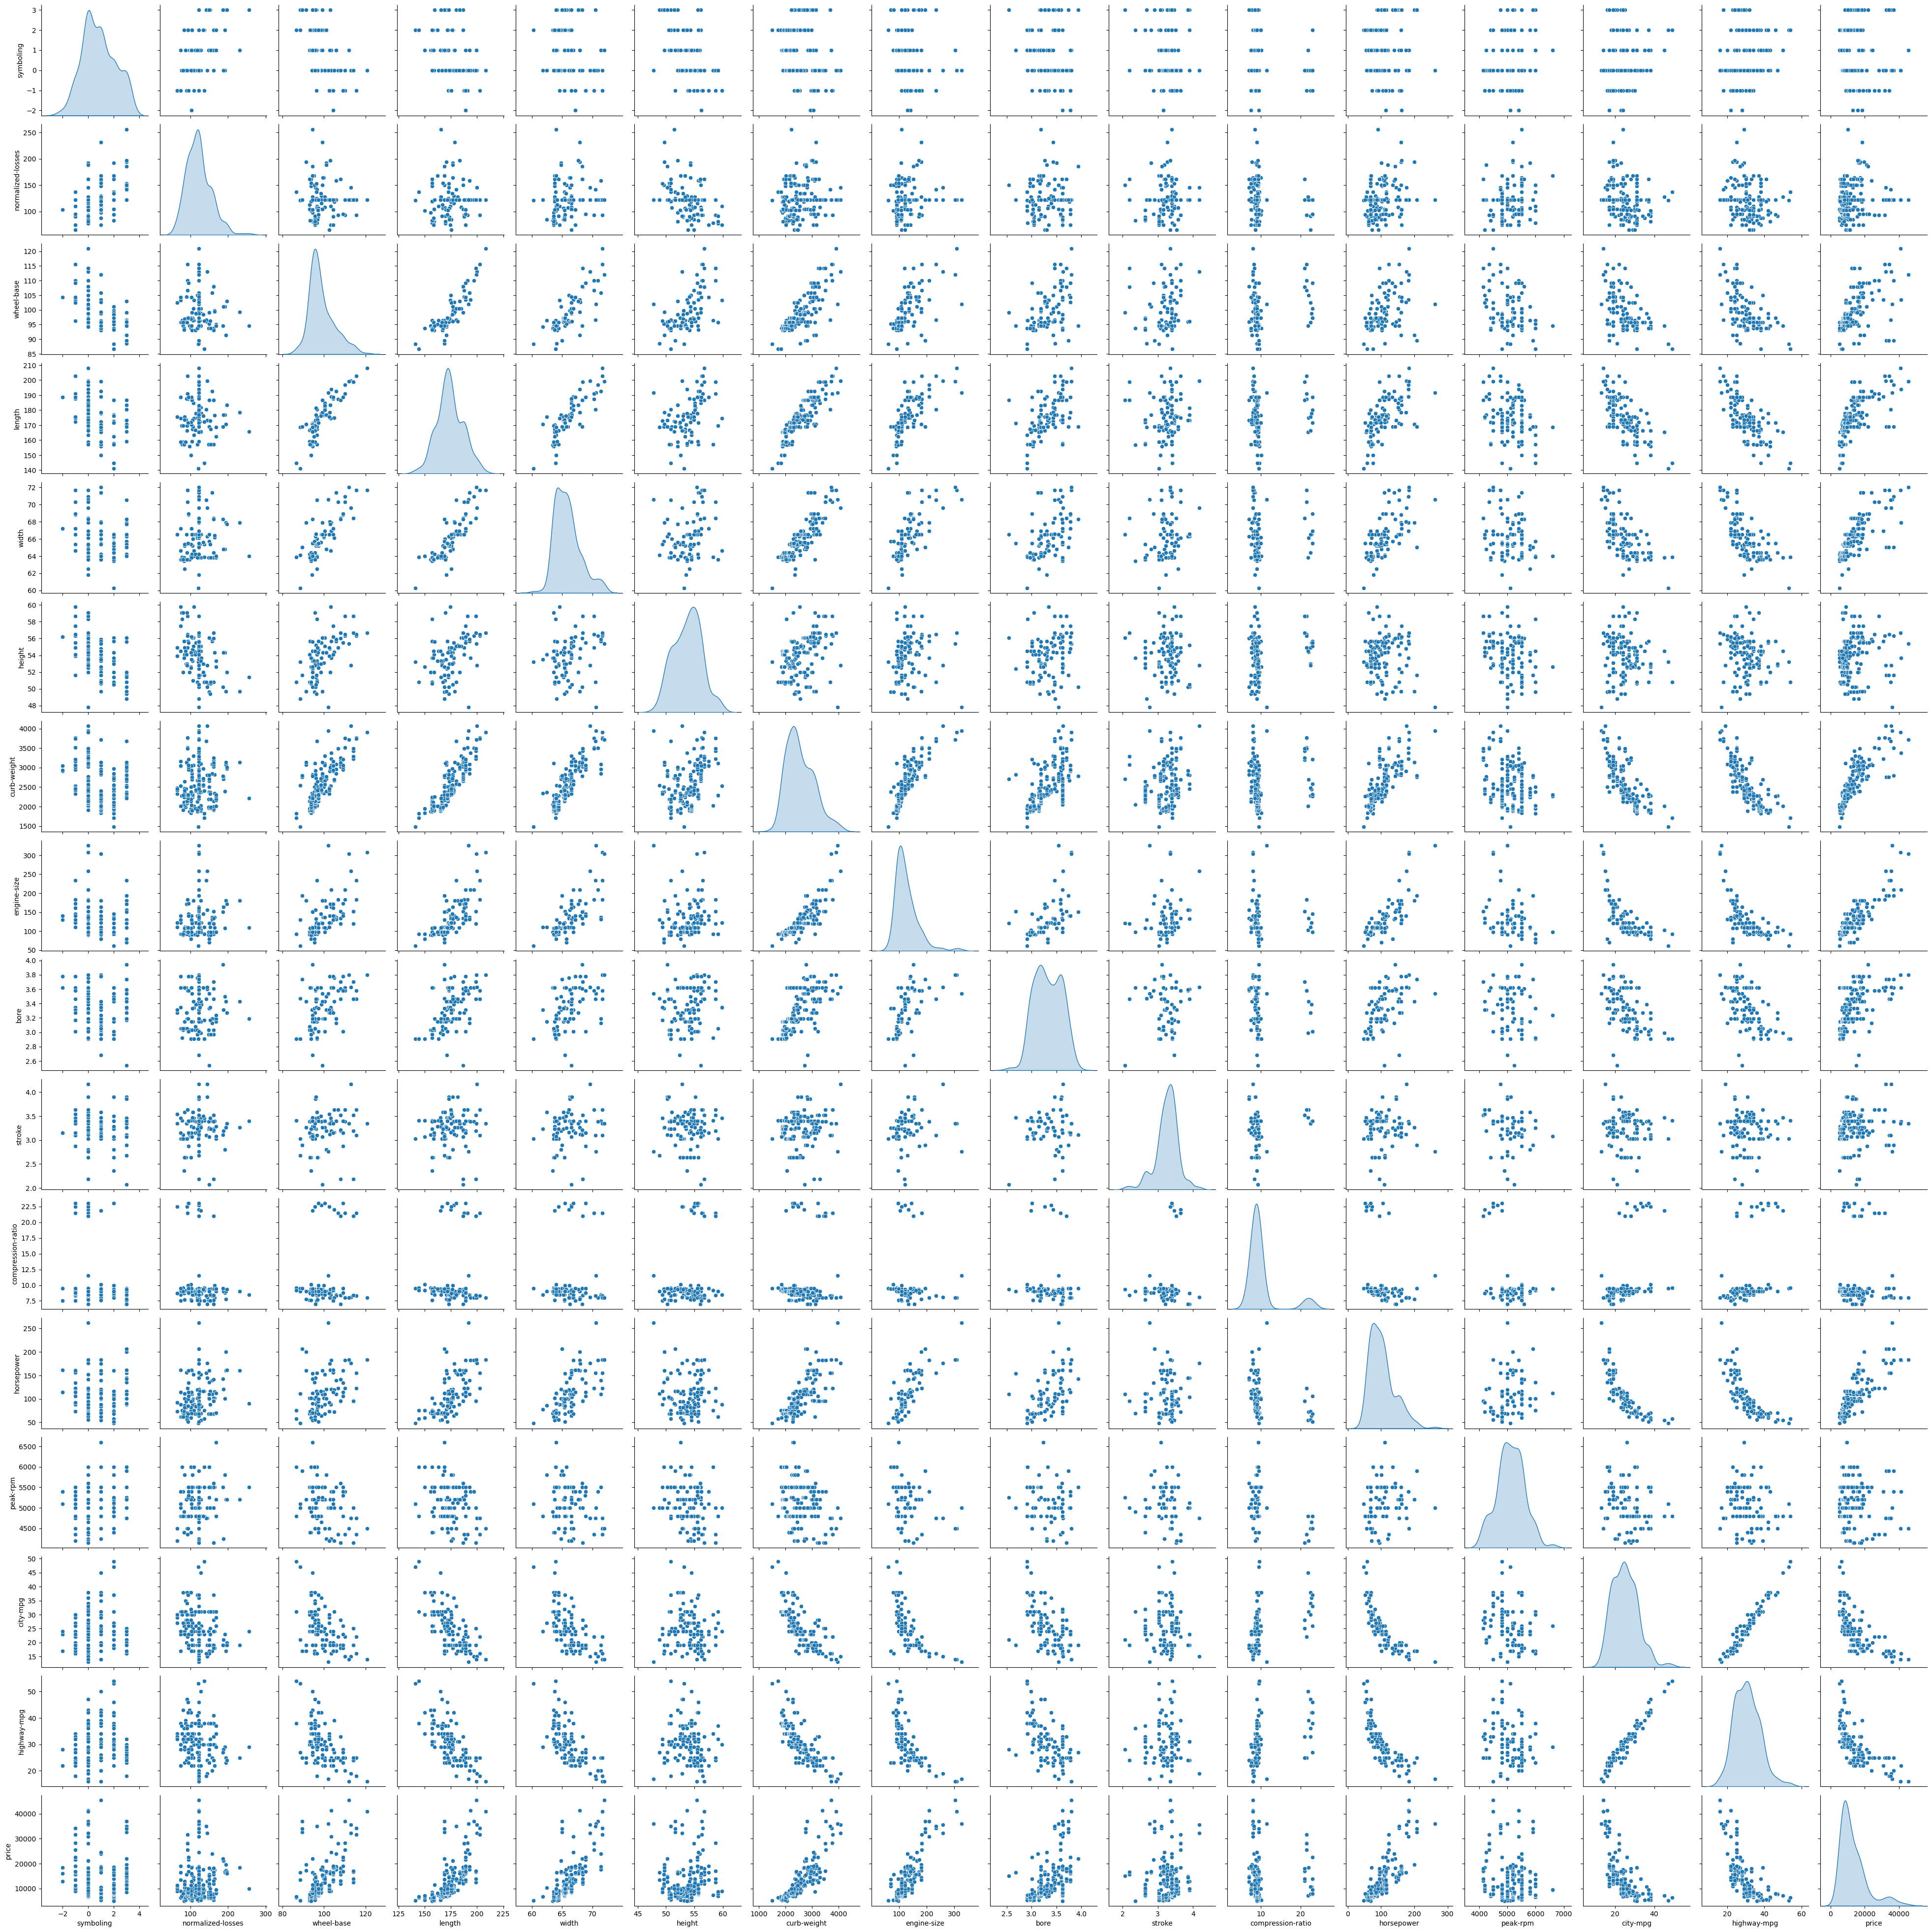

In [50]:
# sns.pairplot(df[num_cols], diag_kind='kde')

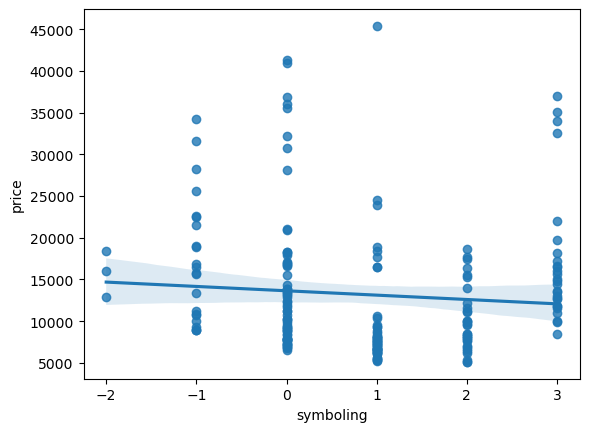

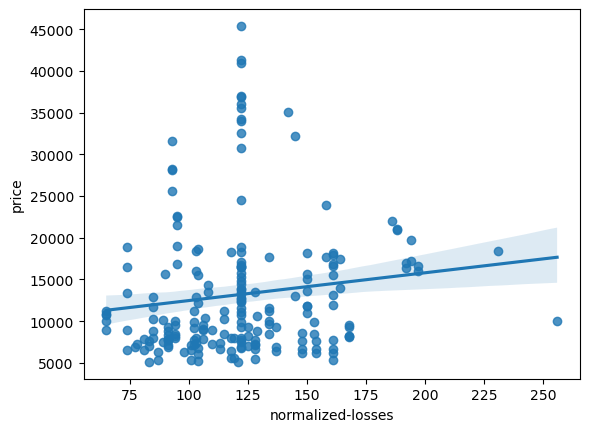

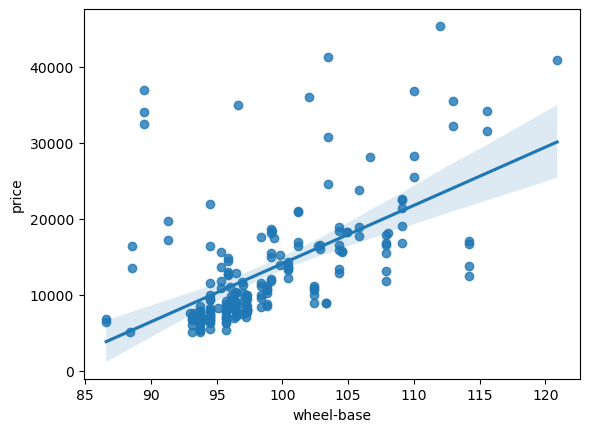

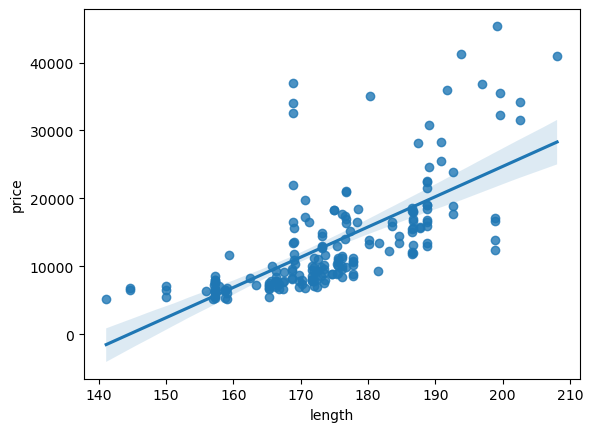

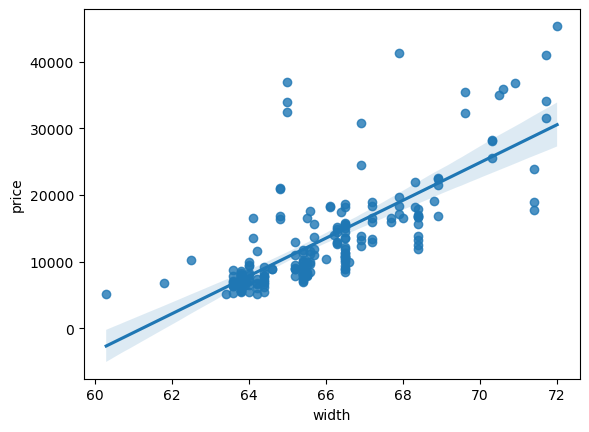

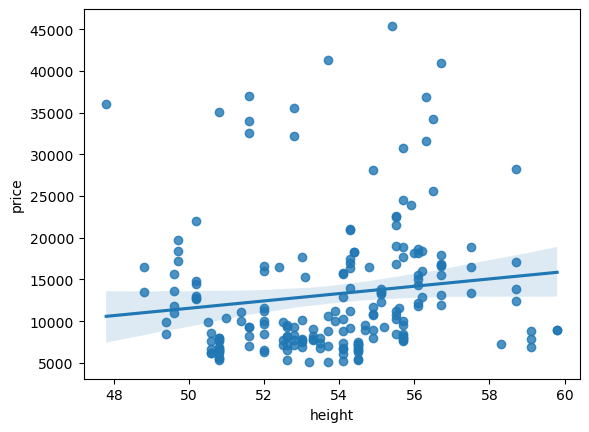

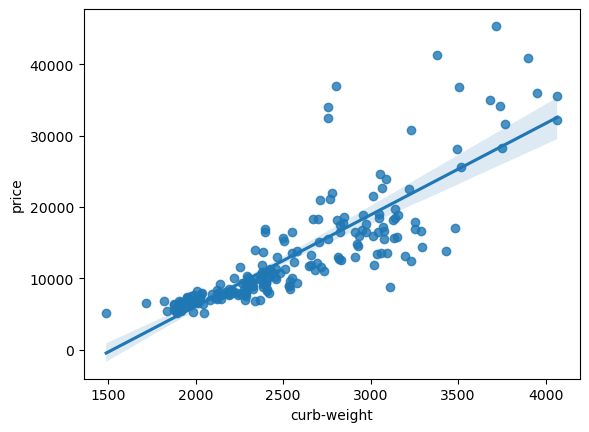

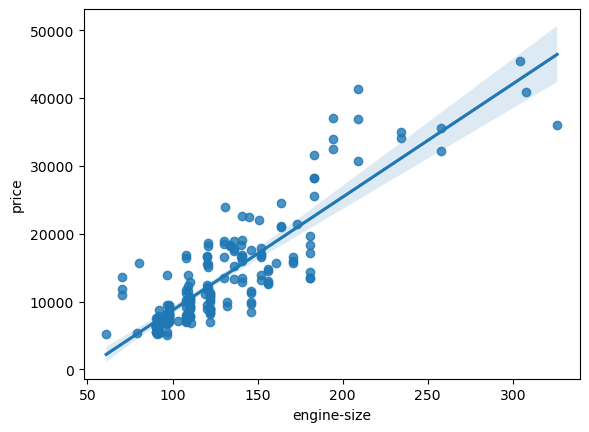

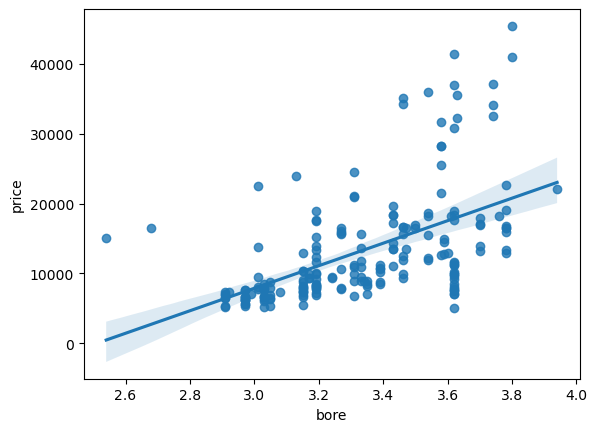

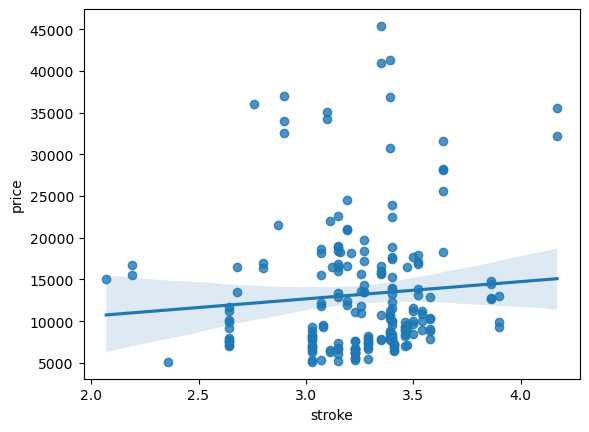

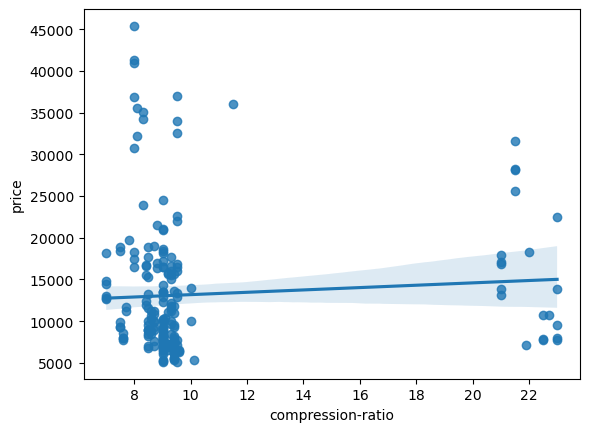

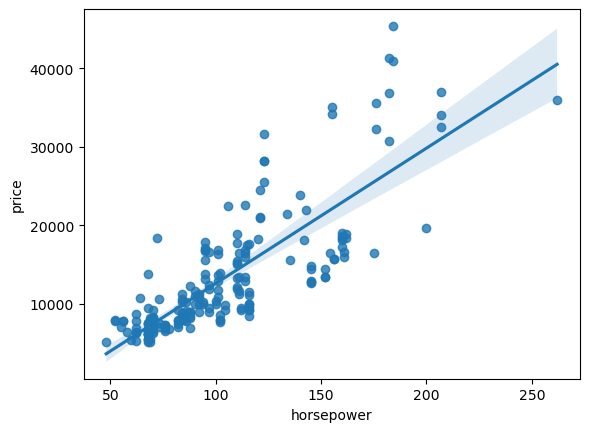

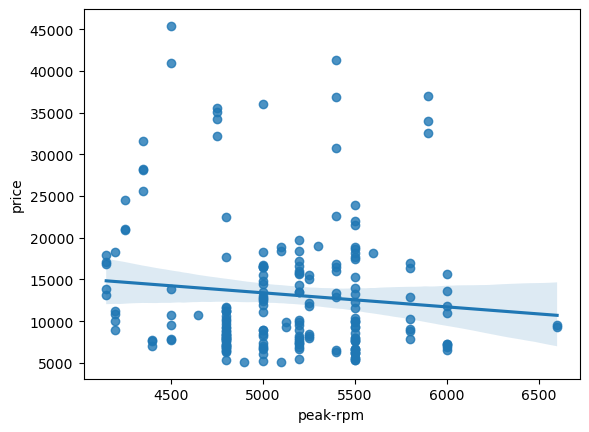

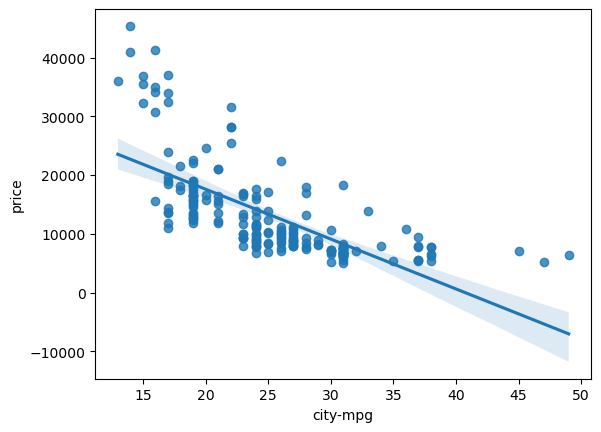

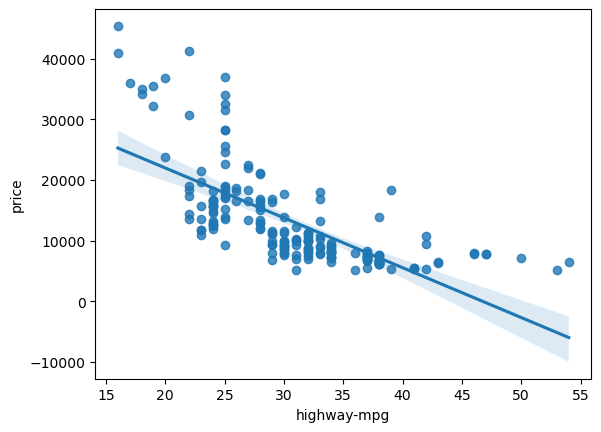

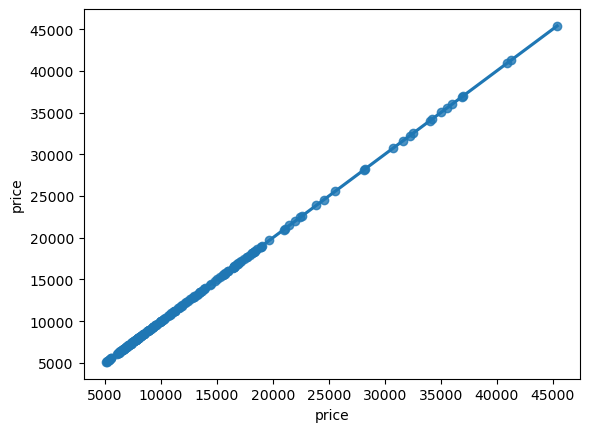

In [61]:
# correlation matrix
for col in num_cols:
    sns.regplot(x=col, y='price', data=df)
    plt.show()

In [52]:
nums_cols_to_use = [
    'horsepower',
    'wheel-base',
    'length',
    'width',
    'curb-weight',
    'engine-size',
    'bore',
    'city-mpg',
    'highway-mpg',
]

box plot correlation for categorical variables

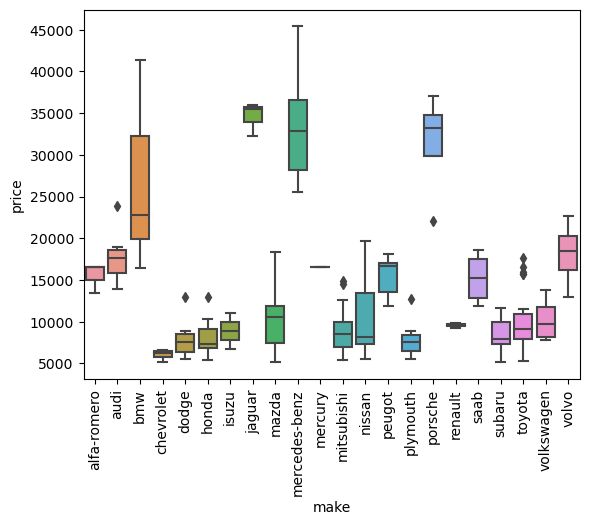

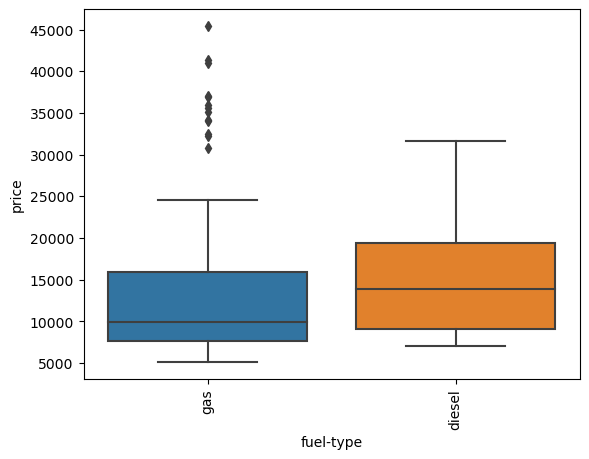

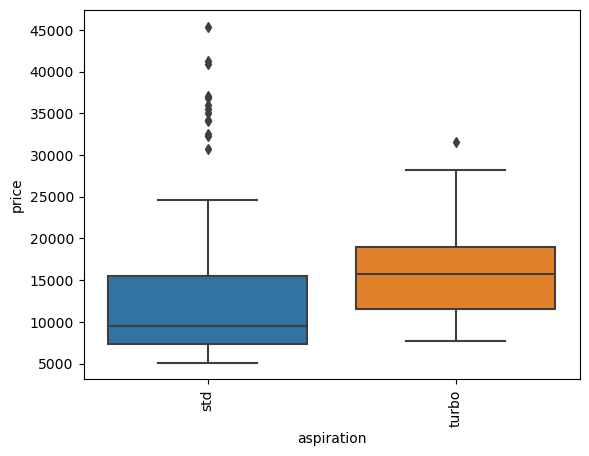

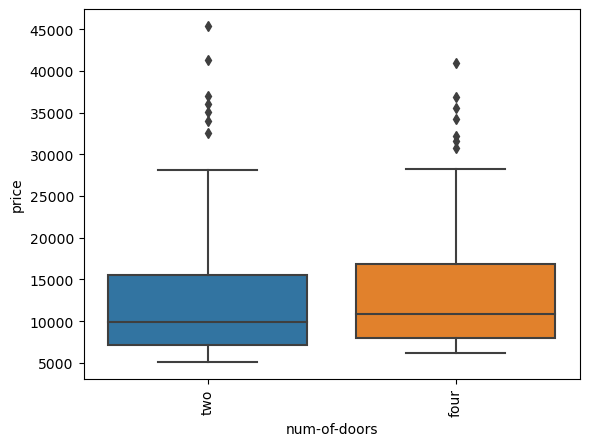

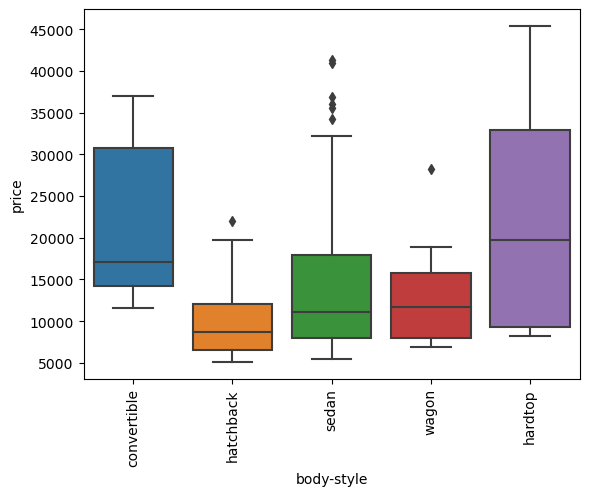

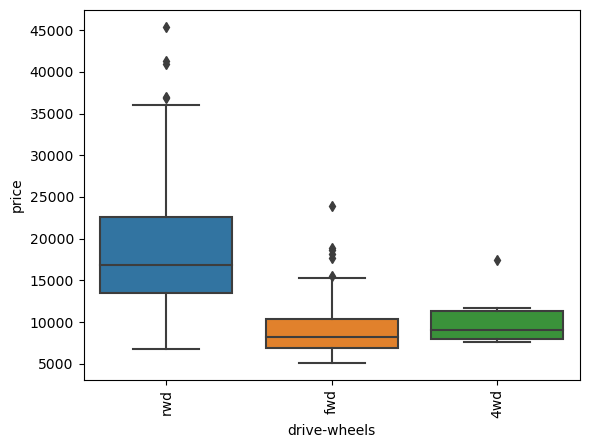

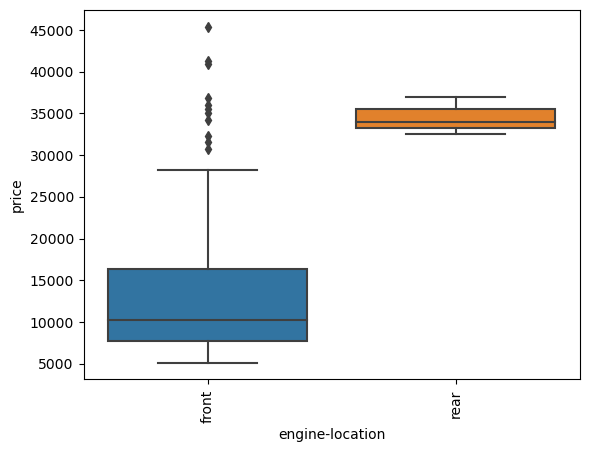

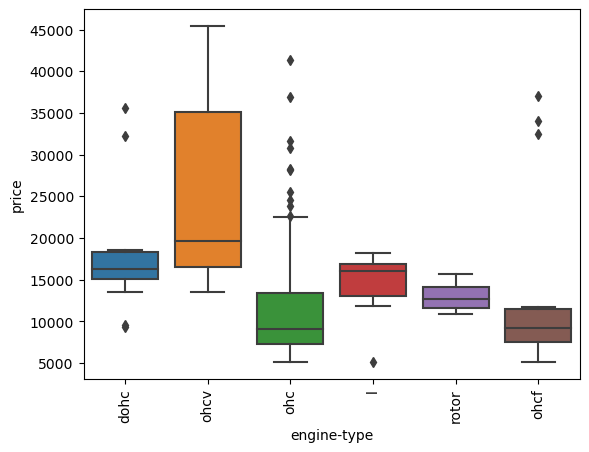

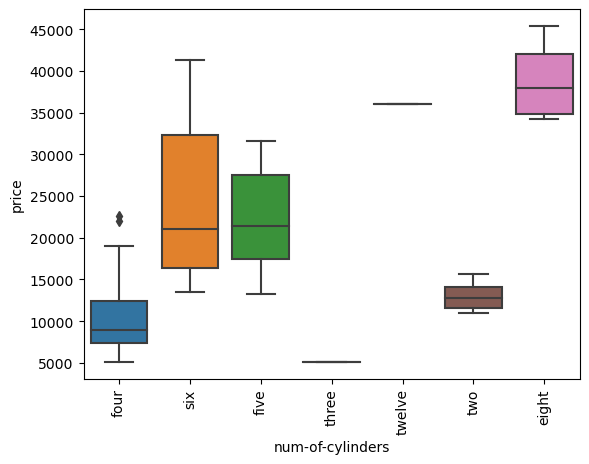

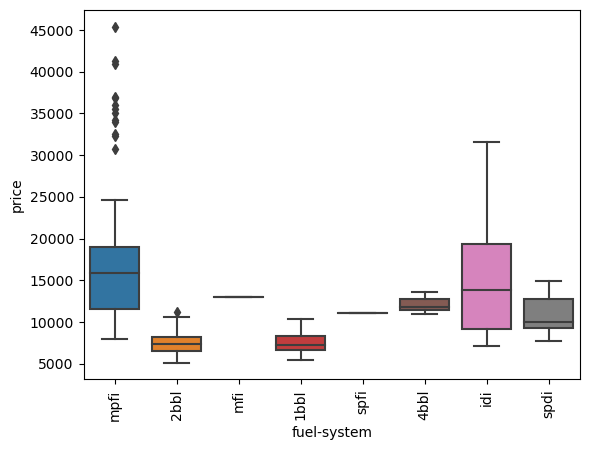

In [71]:
for col in cat_cols:
    sns.boxplot(x=col, y='price', data=df)
    plt.xticks(rotation=90)
    plt.show()